In [5]:
# -*- coding: utf-8 -*-
# This code is written in Python 3.7. Install the required packages using:
# pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.preprocessing import LabelEncoder
import time

# ---------------------------- Helper Functions ----------------------------
def evaluate_model(y_true, y_pred, model_name):
    """Calculate and return performance metrics."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }


def plot_confusion_matrix(y_true, y_pred, classes, title):
    """Plot and display a confusion matrix."""
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [6]:

# ---------------------------- Data Preprocessing ----------------------------
df = pd.read_csv('/home/ibibers@ads.iu.edu/IDS_Datasets/Combined_datasets/CICIDS2017_combined_dataset.csv')

df = df.drop_duplicates()
df.rename(columns=lambda x: x.lstrip(), inplace=True)
df['Flow Bytes/s'] = df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean())

le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

dropped_cols = ['Label', 'Flow Packets/s', 'Flow Bytes/s']
X = df.drop(columns=dropped_cols, axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:

# ---------------------------- Feature Selection ----------------------------
# Top features selected using Information Gain
IGtop_5_features = ['Average Packet Size', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Total Length of Bwd Packets']
IGtop_10_features = IGtop_5_features + ['Subflow Bwd Bytes', 'Avg Bwd Segment Size', 'Bwd Packet Length Mean', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes']

# Top features selected using K-best
Kbest_top_5_features = ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Std', 'Flow IAT Max']
Kbest_top_10_features = Kbest_top_5_features + ['Fwd IAT Std', 'Fwd IAT Max', 'Max Packet Length', 'Packet Length Std', 'Packet Length Variance']
  

# Subset data based on feature selection
datasets = {
    "All Features": (X_train, X_test),
    "IG Top 5 Features": (X_train[IGtop_5_features], X_test[IGtop_5_features]),
    "IG Top 10 Features": (X_train[IGtop_10_features], X_test[IGtop_10_features]),
    "KBest Top 5 Features": (X_train[Kbest_top_5_features], X_test[Kbest_top_5_features]),
    "KBest Top 10 Features": (X_train[Kbest_top_10_features], X_test[Kbest_top_10_features]),
}



----- Training Logistic Regression for All Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression (All Features) Metrics:
Accuracy: 0.8884241574871202
Precision: 0.8579271544706497
Recall: 0.8884241574871202
F1 Score: 0.8708499534022773


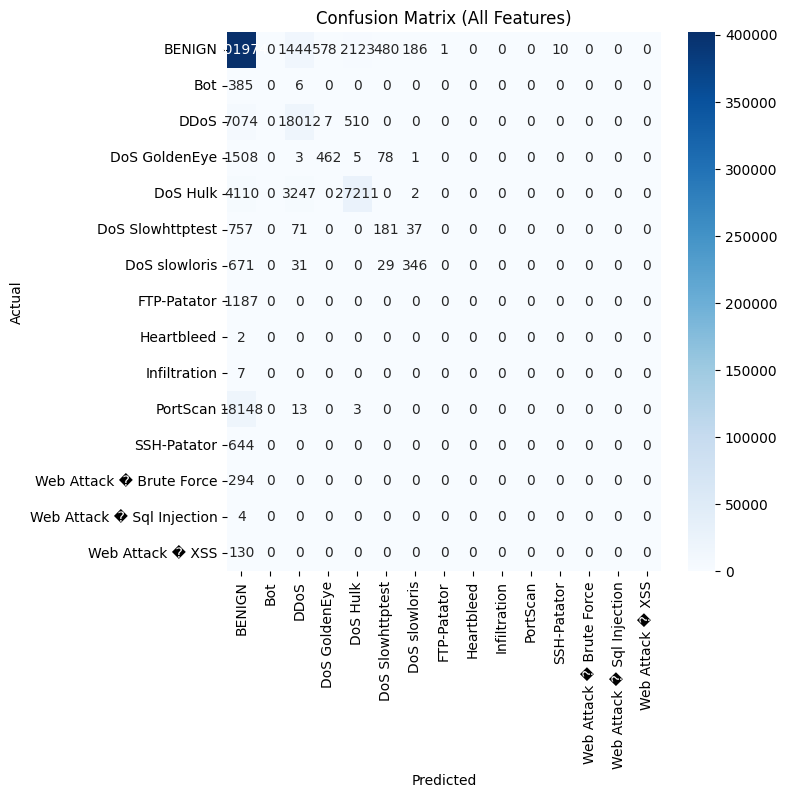


----- Training Logistic Regression for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression (IG Top 5 Features) Metrics:
Accuracy: 0.8713409835610627
Precision: 0.8124068409429197
Recall: 0.8713409835610627
F1 Score: 0.8375374253641883


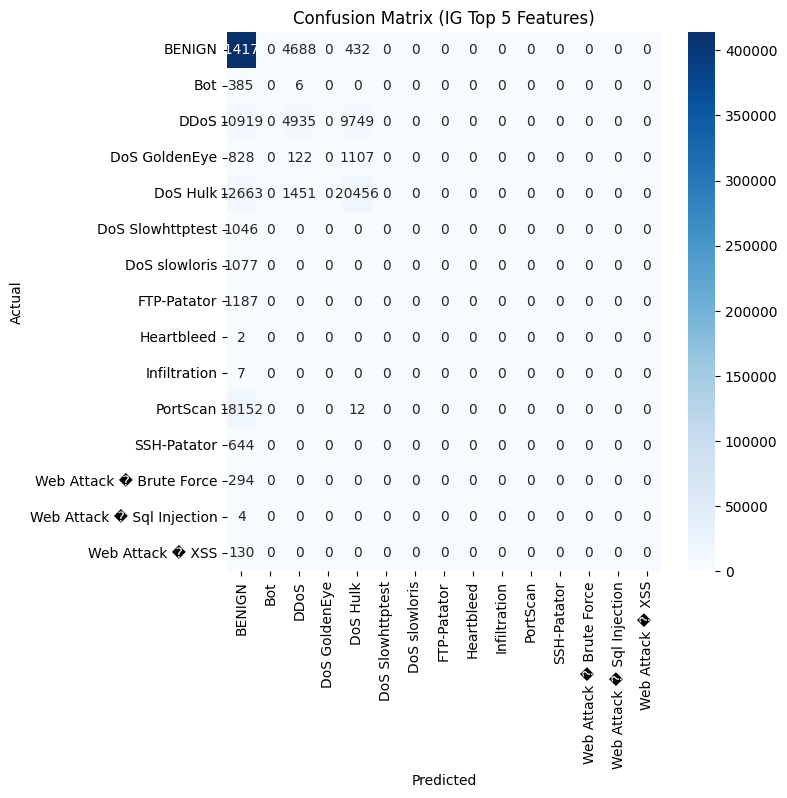


----- Training Logistic Regression for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression (IG Top 10 Features) Metrics:
Accuracy: 0.8951559350054413
Precision: 0.8493131792805493
Recall: 0.8951559350054413
F1 Score: 0.8640566584127014


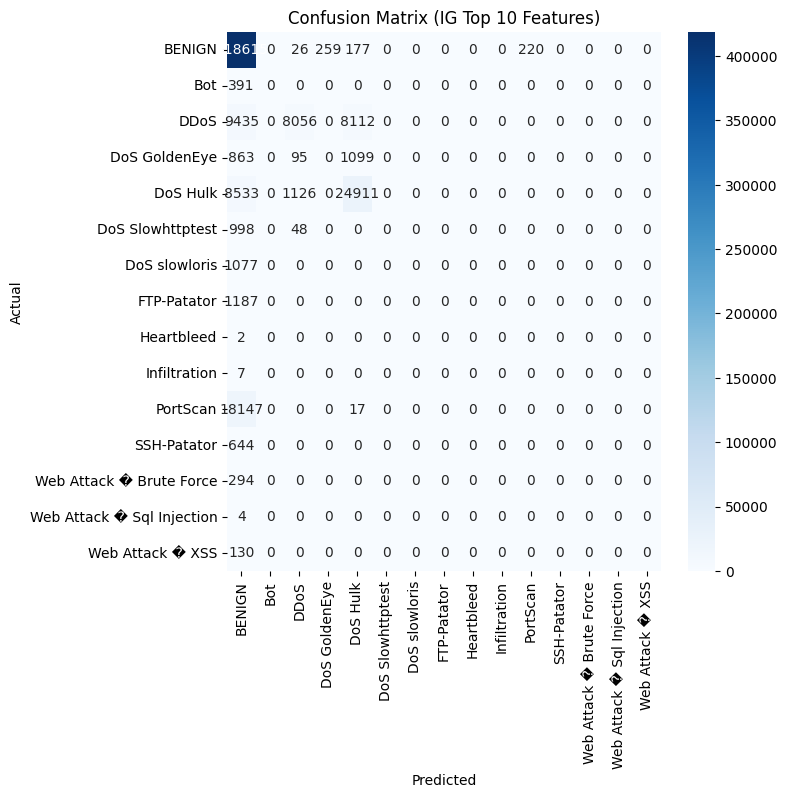


----- Training Logistic Regression for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression (KBest Top 5 Features) Metrics:
Accuracy: 0.48950488926067404
Precision: 0.7402033719056709
Recall: 0.48950488926067404
F1 Score: 0.5574831378957763


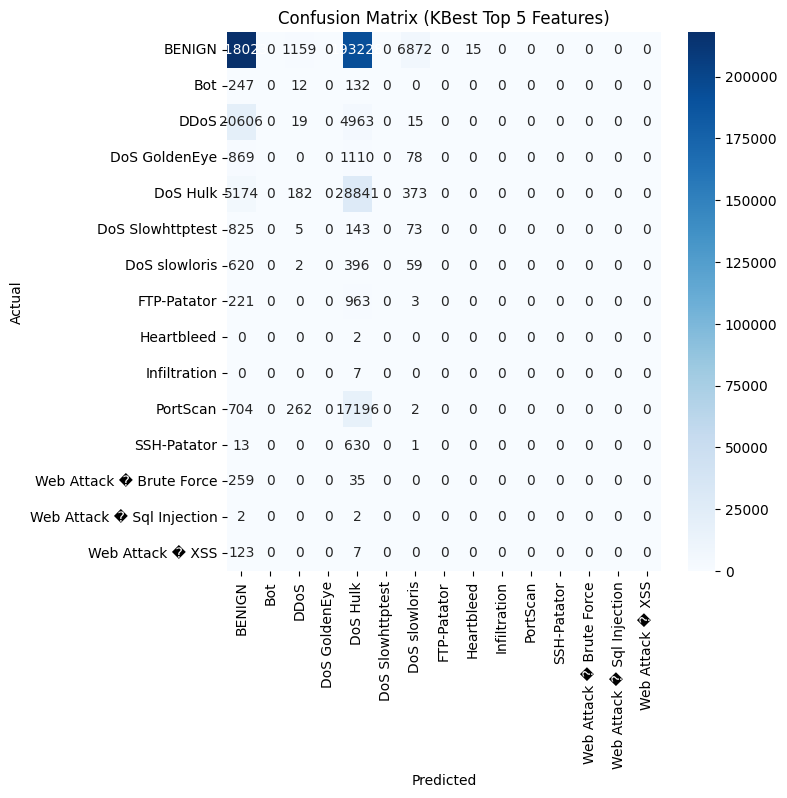


----- Training Logistic Regression for KBest Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression (KBest Top 10 Features) Metrics:
Accuracy: 0.6536167446027835
Precision: 0.7629230705210502
Recall: 0.6536167446027835
F1 Score: 0.6928190017281355


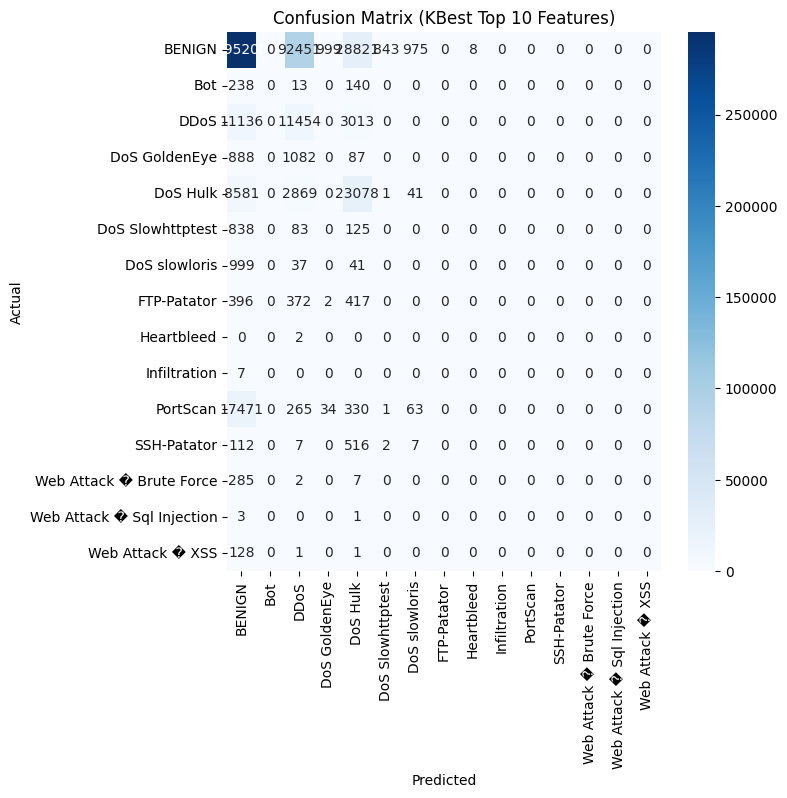

In [8]:

# ---------------------------- Model Training and Evaluation ----------------------------
results = []
for name, (X_tr, X_te) in datasets.items():
    print(f"\n----- Training Logistic Regression for {name} -----")

    start_time = time.time()

    model = LogisticRegression()
    model.fit(X_tr, y_train)

    train_end_time = time.time()

    y_pred = model.predict(X_te)

    pred_end_time = time.time()

    metrics = evaluate_model(y_test, y_pred, f"Logistic Regression ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, y_pred, le.classes_, f"Confusion Matrix ({name})")


In [9]:

# ---------------------------- Summary and Save Results ----------------------------
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("logistic_regression_evaluation_summary.csv", index=False)



Summary of Results:
                                         Model  Accuracy  Precision    Recall  \
0           Logistic Regression (All Features)  0.888424   0.857927  0.888424   
1      Logistic Regression (IG Top 5 Features)  0.871341   0.812407  0.871341   
2     Logistic Regression (IG Top 10 Features)  0.895156   0.849313  0.895156   
3   Logistic Regression (KBest Top 5 Features)  0.489505   0.740203  0.489505   
4  Logistic Regression (KBest Top 10 Features)  0.653617   0.762923  0.653617   

   F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.870850         103.298100             0.159761      103.457861  
1  0.837537          67.540009             0.044957       67.584965  
2  0.864057          84.083086             0.050852       84.133938  
3  0.557483          68.259745             0.046952       68.306697  
4  0.692819          68.251499             0.051913       68.303412  
